# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [81]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "WeatherPy-Data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in Array: {len(cities)}")

Number of cities in Array: 611


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [83]:
print("Begining of data retrival")
print("**********************************")

url = f"https://api.openweathermap.org/data/2.5/weather?units=imperial&appid={weather_api_key}"

city_data = []

# Create counters
record_count = 1
set_count = 1

# loop thorugh all cities from previous section
for i, city in enumerate(cities):
    # group cities in group of 50 for logging purpose
    if (i % 50 == 0 and i >= 50):
        # reset group every 50 counts
        set_count += 1
        record_count = 1
    
    # Create the end point url for each city
    city_url = f"{url}&q={city}"
    
    # print each city and set details
    print(f"Processing record {record_count} in group {set_count} and {city}")
    record_count += 1
    
    try:
        # Run API request to get data in JSON format
        city_weather = requests.get(city_url).json()

        # Add a delay in each call to make sure API calls does not fail. Adding 2 seconds delay after each call
        time.sleep(2)
        
        # Parse out JSON data
        city_lat = city_weather["coord"]["lat"]
        city_log = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country =city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        # Append city information to city data array
        city_data.append({"City": city,
                          "Latitude": city_lat,
                          "Longitude": city_log,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "County": city_country,
                          "Date": city_date
        })
    
        
    except:
        # Skip the city if API call for city throws an error
        print(f"{city} has JSON error...skipping....")
        pass  
    
print("************ API Calls Complete**********************")
print(f"Array Size: {len(city_data)}")
   

Begining of data retrival
**********************************
Processing record 1 in group 1 and longyearbyen
Processing record 2 in group 1 and port blair
Processing record 3 in group 1 and yellowknife
Processing record 4 in group 1 and jamestown
Processing record 5 in group 1 and saint-philippe
Processing record 6 in group 1 and puerto madero
Processing record 7 in group 1 and jinchang
Processing record 8 in group 1 and kodiak
Processing record 9 in group 1 and ewo
Processing record 10 in group 1 and airai
Processing record 11 in group 1 and narsaq
Processing record 12 in group 1 and tuktoyaktuk
Processing record 13 in group 1 and ahipara
Processing record 14 in group 1 and busselton
Processing record 15 in group 1 and nome
Processing record 16 in group 1 and tiksi
Processing record 17 in group 1 and vaini
Processing record 18 in group 1 and ponta do sol
Processing record 19 in group 1 and soe
Processing record 20 in group 1 and iqaluit
Processing record 21 in group 1 and kenora
Proce

Processing record 19 in group 4 and kupang
Processing record 20 in group 4 and huarmey
Processing record 21 in group 4 and dedougou
Processing record 22 in group 4 and phan rang
phan rang has JSON error...skipping....
Processing record 23 in group 4 and kutum
Processing record 24 in group 4 and klaksvik
Processing record 25 in group 4 and tuatapere
Processing record 26 in group 4 and dubbo
Processing record 27 in group 4 and labuhan
Processing record 28 in group 4 and nurota
Processing record 29 in group 4 and kawalu
Processing record 30 in group 4 and sur
Processing record 31 in group 4 and sambava
Processing record 32 in group 4 and broken hill
Processing record 33 in group 4 and arraial do cabo
Processing record 34 in group 4 and sangar
Processing record 35 in group 4 and mana
Processing record 36 in group 4 and udachnyy
Processing record 37 in group 4 and bayir
Processing record 38 in group 4 and hofn
Processing record 39 in group 4 and kapoeta
Processing record 40 in group 4 and b

Processing record 42 in group 7 and rognan
Processing record 43 in group 7 and presidente epitacio
Processing record 44 in group 7 and panguna
Processing record 45 in group 7 and severo-yeniseyskiy
Processing record 46 in group 7 and fairview
Processing record 47 in group 7 and shingu
Processing record 48 in group 7 and inhambane
Processing record 49 in group 7 and usinsk
Processing record 50 in group 7 and teguise
Processing record 1 in group 8 and laguna
Processing record 2 in group 8 and turayf
Processing record 3 in group 8 and artyk
artyk has JSON error...skipping....
Processing record 4 in group 8 and penjamillo
penjamillo has JSON error...skipping....
Processing record 5 in group 8 and tutoia
Processing record 6 in group 8 and samarai
Processing record 7 in group 8 and shitanjing
Processing record 8 in group 8 and lamu
Processing record 9 in group 8 and gejiu
Processing record 10 in group 8 and shenzhen
Processing record 11 in group 8 and palmer
Processing record 12 in group 8 a

Processing record 9 in group 11 and port shepstone
Processing record 10 in group 11 and rungata
rungata has JSON error...skipping....
Processing record 11 in group 11 and culebra
Processing record 12 in group 11 and belmonte
Processing record 13 in group 11 and ariquemes
Processing record 14 in group 11 and hobyo
Processing record 15 in group 11 and ambilobe
Processing record 16 in group 11 and sujangarh
Processing record 17 in group 11 and santa vitoria do palmar
Processing record 18 in group 11 and kalmunai
Processing record 19 in group 11 and sola
Processing record 20 in group 11 and karpogory
Processing record 21 in group 11 and benjamin hill
Processing record 22 in group 11 and henties bay
Processing record 23 in group 11 and tiznit
Processing record 24 in group 11 and bend
Processing record 25 in group 11 and chichibu
Processing record 26 in group 11 and muros
Processing record 27 in group 11 and praia da vitoria
Processing record 28 in group 11 and bose
Processing record 29 in g

In [84]:
city_data_pd = pd.DataFrame(city_data)
city_data_pd.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,County,Date
0,longyearbyen,78.2186,15.6401,48.04,87,75,5.75,SJ,1660154421
1,port blair,11.6667,92.7500,81.21,83,100,14.52,IN,1660154423
2,yellowknife,62.4560,-114.3525,59.56,82,100,13.00,CA,1660154426
3,jamestown,42.0970,-79.2353,78.03,46,24,3.00,US,1660154341
4,saint-philippe,-21.3585,55.7679,65.79,77,65,16.98,RE,1660154165


In [85]:
# Export city data to csv
city_data_pd.to_csv(output_data_file)

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
city_data_pd.describe()

,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,5.600000e+02
mean,19.542228,17.894024,69.077643,72.275000,56.253571,8.317839,1.660090e+09
std,32.858625,88.496189,13.546453,20.045193,38.568249,6.011331,6.134172e+02
min,-54.800000,-175.200000,36.140000,1.000000,0.000000,0.000000,1.660089e+09
25%,-7.628700,-57.974950,58.150000,62.000000,17.750000,3.510000,1.660090e+09
50%,21.692900,21.101800,70.440000,77.000000,65.000000,6.910000,1.660090e+09
75%,46.440750,88.873925,79.495000,87.000000,97.000000,11.500000,1.660091e+09
max,78.218600,179.316700,101.970000,100.000000,100.000000,32.170000,1.660091e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [13]:
city_data_humidity_pd = city_data_pd.loc[city_data_pd["Humidity"] > 100]
city_data_humidity_pd.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date


In [5]:
#  Get the indices of cities that have humidity over 100%.


In [14]:
city_data_humidity_pd = city_data_pd.loc[city_data_pd["Humidity"] > 100].index
print(city_data_humidity_pd)

Int64Index([], dtype='int64')


In [6]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [16]:
clean_city_data = city_data_pd.drop(city_data_humidity_pd, inplace = False)
clean_city_data.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,longyearbyen,78.2186,15.6401,44.44,93,75,9.22,1660089117
1,port blair,11.6667,92.7500,80.64,83,40,6.91,1660089194
2,yellowknife,62.4560,-114.3525,66.72,52,75,12.66,1660088726
3,jamestown,42.0970,-79.2353,69.06,61,20,6.91,1660088860
4,saint-philippe,-21.3585,55.7679,65.79,77,66,16.11,1660088989


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

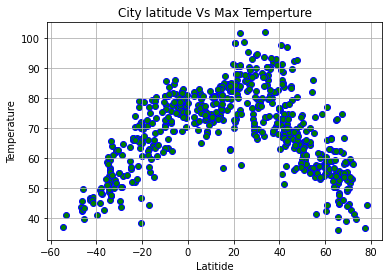

In [37]:
Latitude = clean_city_data["Latitude"]
Temperature = clean_city_data["Max Temp"]

correlation = st.pearsonr(Latitude, Temperature)
(slope, intercept, rvalue, pvalue, stderr) = linregress(Latitude, Temperature)
regress_values = Latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(Latitude, Temperature, marker="o", facecolor="green", edgecolor="blue")
#plt.plot(Latitude,regress_values,"r-")
#plt.annotate(line_eq,(20,25),fontsize=15,color="red")
plt.xlabel("Latitide")
plt.ylabel("Temperature")
plt.title("City latitude Vs Max Temperture")
plt.grid()
plt.show()
#
# Observations
# 1. The city temperture is high when its closer to eqautor
# 2. The cities that are between latitude 20 to 40 have highest tempertures in the set of 560 cities that were analyzed
#

## Latitude vs. Humidity Plot

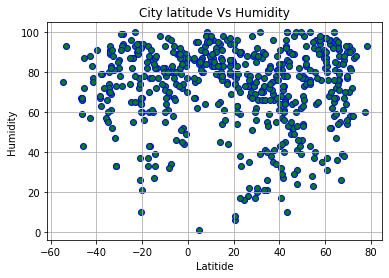

In [42]:
Latitude = clean_city_data["Latitude"]
Humidity = clean_city_data["Humidity"]

plt.scatter(Latitude, Humidity, marker="o", facecolor="green", edgecolor="blue")
plt.xlabel("Latitide")
plt.ylabel("Humidity")
plt.title("City latitude Vs Humidity")
plt.grid()
plt.show()

#
# Observations
# 1. Most cities have high humidity
# 2. No direct coorelation was identified 

## Latitude vs. Cloudiness Plot

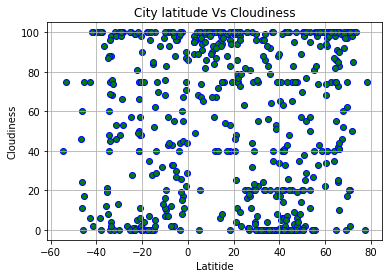

In [41]:
Latitude = clean_city_data["Latitude"]
Cloudiness = clean_city_data["Cloudiness"]

plt.scatter(Latitude, Cloudiness, marker="o", facecolor="green", edgecolor="blue")
plt.xlabel("Latitide")
plt.ylabel("Cloudiness")
plt.title("City latitude Vs Cloudiness")
plt.grid()
plt.show()
#
# Observations
# 1. Varied cloudiness, no clear trend identified 
# 

## Latitude vs. Wind Speed Plot

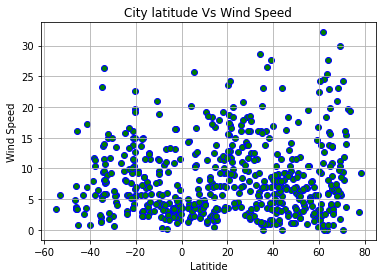

In [40]:
Latitude = clean_city_data["Latitude"]
WindSpeed = clean_city_data["Wind Speed"]

plt.scatter(Latitude, WindSpeed, marker="o", facecolor="green", edgecolor="blue")
plt.xlabel("Latitide")
plt.ylabel("Wind Speed")
plt.title("City latitude Vs Wind Speed")
plt.grid()
plt.show()

#
# Observations
# 1. Most cities have wind speed from 0 to 15
# 2. 

## Linear Regression

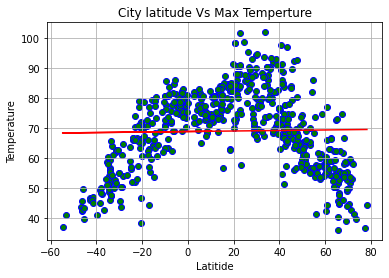

In [80]:
Latitude = clean_city_data["Latitude"]
Temperature = clean_city_data["Max Temp"]

correlation = st.pearsonr(Latitude, Temperature)
(slope, intercept, rvalue, pvalue, stderr) = linregress(Latitude, Temperature)
regress_values = Latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(Latitude, Temperature, marker="o", facecolor="green", edgecolor="blue")
plt.plot(Latitude,regress_values,"r-")
plt.annotate(line_eq,(20,25),fontsize=15,color="red")
plt.xlabel("Latitide")
plt.ylabel("Temperature")
plt.title("City latitude Vs Max Temperture")
plt.grid()
plt.show()


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r value is 0.4519404206724001


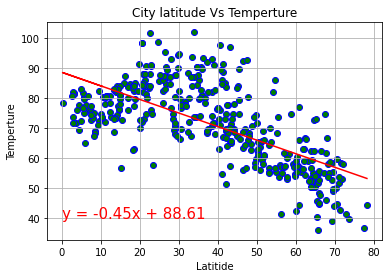

In [70]:
clean_city_data_nh = clean_city_data.loc[clean_city_data["Latitude"] >=0 ]
clean_city_data_sh = clean_city_data.loc[clean_city_data["Latitude"] < 0 ]

LatitudeNh = clean_city_data_nh["Latitude"]
TempertureNh = clean_city_data_nh["Max Temp"]

correlation = st.pearsonr(LatitudeNh, TempertureNh)
(slope, intercept, rvalue, pvalue, stderr) = linregress(LatitudeNh, TempertureNh)
regress_values = LatitudeNh * slope + intercept

# Print r value which is square
print(f"The r value is {rvalue**2}")

plt.scatter(LatitudeNh, TempertureNh, marker="o", facecolor="green", edgecolor="blue")
plt.plot(LatitudeNh,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.xlabel("Latitide")
plt.ylabel("Temperture")
plt.title("City latitude Vs Temperture")
plt.annotate(line_eq,(0,40),fontsize=15,color="red")
plt.grid()
plt.show()

#
# Observations in Northern Hemisphere
# 1. The temperture is inversely proportionate to latitude
# 2. As the latitude goes up, the max temperture goes down. In other words, the cities that are closer to equator have 
#   high temperture compared cities that are further from equator

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r value is 0.7113603684010861


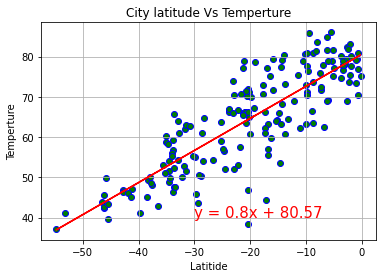

In [71]:
LatitudeSh = clean_city_data_sh["Latitude"]
TempertureSh = clean_city_data_sh["Max Temp"]

correlation = st.pearsonr(LatitudeSh, TempertureSh)
(slope, intercept, rvalue, pvalue, stderr) = linregress(LatitudeSh, TempertureSh)
regress_values = LatitudeSh * slope + intercept

# Print r value which is square
print(f"The r value is {rvalue**2}")

plt.scatter(LatitudeSh, TempertureSh, marker="o", facecolor="green", edgecolor="blue")
plt.plot(LatitudeSh,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.xlabel("Latitide")
plt.ylabel("Temperture")
plt.title("City latitude Vs Temperture")
plt.annotate(line_eq,(-30,40),fontsize=15,color="red")
plt.grid()
plt.show()

#
# Observations in Southern Hemisphere
# 1. The temperture is inversely proportionate to latitude
# 2. As the latitude goes up, the max temperture goes down. In other words, the cities that are closer to equator have 
#   high temperture compared cities that are further from equator
# 3. A very strong coorelation was identified 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r value is 0.005036856514994492


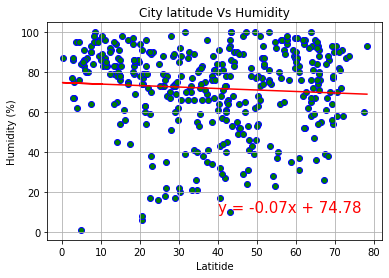

In [69]:
HumidityNh = clean_city_data_nh["Humidity"]

correlation = st.pearsonr(LatitudeNh, HumidityNh)
(slope, intercept, rvalue, pvalue, stderr) = linregress(LatitudeNh, HumidityNh)
regress_values = LatitudeNh * slope + intercept

# Print r value which is square
print(f"The r value is {rvalue**2}")

plt.scatter(LatitudeNh, HumidityNh, marker="o", facecolor="green", edgecolor="blue")
plt.plot(LatitudeNh,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.xlabel("Latitide")
plt.ylabel("Humidity (%)")
plt.title("City latitude Vs Humidity")
plt.annotate(line_eqNh,(40,10),fontsize=15,color="red")
plt.grid()
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r value is 3.234508432700624e-05


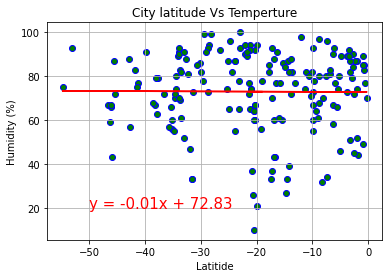

In [74]:
HumiditySh = clean_city_data_sh["Humidity"]

correlation = st.pearsonr(LatitudeSh, HumiditySh)
(slope, intercept, rvalue, pvalue, stderr) = linregress(LatitudeSh, HumiditySh)
regress_values = LatitudeSh * slope + intercept

# Print r value which is square
print(f"The r value is {rvalue**2}")

plt.scatter(LatitudeSh, HumiditySh, marker="o", facecolor="green", edgecolor="blue")
plt.plot(LatitudeSh,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.xlabel("Latitide")
plt.ylabel("Humidity (%)")
plt.title("City latitude Vs Temperture")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.grid()
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r value is 0.009168183246341173


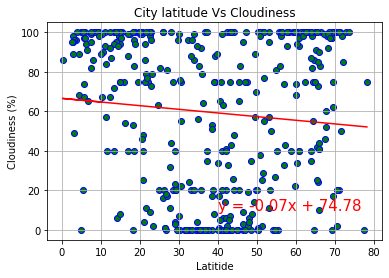

In [75]:
CloudinessNh = clean_city_data_nh["Cloudiness"]

correlation = st.pearsonr(LatitudeNh, CloudinessNh)
(slope, intercept, rvalue, pvalue, stderr) = linregress(LatitudeNh, CloudinessNh)
regress_values = LatitudeNh * slope + intercept

# Print r value which is square
print(f"The r value is {rvalue**2}")

plt.scatter(LatitudeNh, CloudinessNh, marker="o", facecolor="green", edgecolor="blue")
plt.plot(LatitudeNh,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.xlabel("Latitide")
plt.ylabel("Cloudiness (%)")
plt.title("City latitude Vs Cloudiness")
plt.annotate(line_eqNh,(40,10),fontsize=15,color="red")
plt.grid()
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r value is 0.00027378060816402847


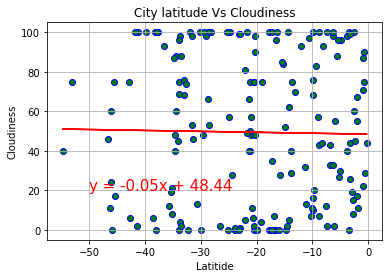

In [76]:
CloudinessSh = clean_city_data_sh["Cloudiness"]

correlation = st.pearsonr(LatitudeSh, CloudinessSh)
(slope, intercept, rvalue, pvalue, stderr) = linregress(LatitudeSh, CloudinessSh)
regress_values = LatitudeSh * slope + intercept

# Print r value which is square
print(f"The r value is {rvalue**2}")

plt.scatter(LatitudeSh, CloudinessSh, marker="o", facecolor="green", edgecolor="blue")
plt.plot(LatitudeSh,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.xlabel("Latitide")
plt.ylabel("Cloudiness")
plt.title("City latitude Vs Cloudiness")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.grid()
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r value is 0.0009504397363327124


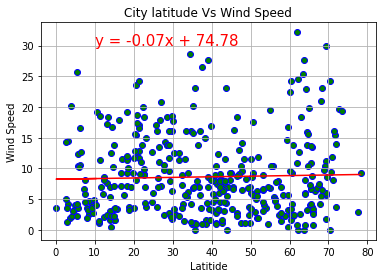

In [79]:
WindNh = clean_city_data_nh["Wind Speed"]

correlation = st.pearsonr(LatitudeNh, WindNh)
(slope, intercept, rvalue, pvalue, stderr) = linregress(LatitudeNh, WindNh)
regress_values = LatitudeNh * slope + intercept

# Print r value which is square
print(f"The r value is {rvalue**2}")

plt.scatter(LatitudeNh, WindNh, marker="o", facecolor="green", edgecolor="blue")
plt.plot(LatitudeNh,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.xlabel("Latitide")
plt.ylabel("Wind Speed")
plt.title("City latitude Vs Wind Speed")
plt.annotate(line_eqNh,(10,30),fontsize=15,color="red")
plt.grid()
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r value is 0.011922901706235186


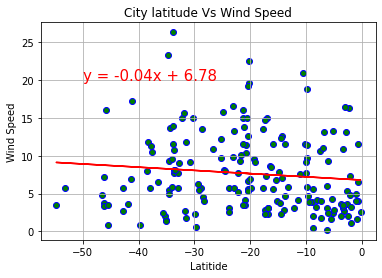

In [77]:
WindSh = clean_city_data_sh["Wind Speed"]

correlation = st.pearsonr(LatitudeSh, WindSh)
(slope, intercept, rvalue, pvalue, stderr) = linregress(LatitudeSh, WindSh)
regress_values = LatitudeSh * slope + intercept

# Print r value which is square
print(f"The r value is {rvalue**2}")

plt.scatter(LatitudeSh, WindSh, marker="o", facecolor="green", edgecolor="blue")
plt.plot(LatitudeSh,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.xlabel("Latitide")
plt.ylabel("Wind Speed")
plt.title("City latitude Vs Wind Speed")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.grid()
plt.show()